<p style ="font-size:30px; color:red"><b>Exploratory Data Analysis(EDA):

<p style ="font-size:30px; color:blue"><b>Dataset Description:

1. **The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO).**
2. **The study is primarily limited  only to students with engineering disciplines.** 
3. **The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills.** 
4. **The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points.** 
4. **The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset.**  

<p style ="font-size:25px; color:red"><b>Importing some neccessary libraries:</b></p>

In [ ]:
#hi print("hi")

In [4]:
## import liberies 
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime


from matplotlib.patches import ConnectionPatch
import seaborn as sns


<p style ="font-size:30px; color:red"><b>Read the exploring the data:

In [5]:
import pandas as pd
ameo = pd.read_excel(r"C:\Users\shirisha\Desktop\data scince\data sceince intenship\data.xlsx")
ameo.head()

Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0              -1              -1              -1          -1         -1   
1              -1              -1              -1          -1         -1   
2              -1              -1              -1          -1         -1   
3              -1              -1              -1          -1         -1   
4              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [6]:
ameo.shape

(3998, 39)

In [7]:
ameo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

##### Finding number of "Missing / NAN" values

In [8]:
ameo.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

<p style ="font-size:30px; color:red"><b>Analysing the Data:

## Names of the columns

In [9]:
ameo.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

### information of all coloumns

In [10]:
ameo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

### To check the number of rows and columns

In [11]:
ameo.shape

(3998, 39)

## checking the data types of all columns

In [12]:
ameo.dtypes

Unnamed: 0                       object
ID                                int64
Salary                            int64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64


### Gathering all "Statistical Details" of different columns

In [13]:
ameo.describe(include="all").T

C:\Users\shirisha\AppData\Local\Temp\ipykernel_12588\3910478390.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ameo.describe(include="all").T
C:\Users\shirisha\AppData\Local\Temp\ipykernel_12588\3910478390.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ameo.describe(include="all").T


count unique  \
Unnamed: 0               3998      1   
ID                     3998.0    NaN   
Salary                 3998.0    NaN   
DOJ                      3998     81   
DOL                      3998     67   
Designation              3998    419   
JobCity                  3998    339   
Gender                   3998      2   
DOB                      3998   1872   
10percentage           3998.0    NaN   
10board                  3998    275   
12graduation           3998.0    NaN   
12percentage           3998.0    NaN   
12board                  3998    340   
CollegeID              3998.0    NaN   
CollegeTier            3998.0    NaN   
Degree                   3998      4   
Specialization           3998     46   
collegeGPA             3998.0    NaN   
CollegeCityID          3998.0    NaN   
CollegeCityTier        3998.0    NaN   
CollegeState             3998     26   
GraduationYear         3998.0    NaN   
English                3998.0    NaN   
Logical                3998.0    NaN   
Quant                  3998.0    NaN   
Domain                 3998.0    NaN   
ComputerProgramming    3998.0    NaN   
ElectronicsAndSemicon  3998.0    NaN   
ComputerScience        3998.0    NaN   
MechanicalEngg         3998.0    NaN   
ElectricalEngg         3998.0    NaN   
TelecomEngg            3998.0    NaN   
CivilEngg              3998.0    NaN   
conscientiousness      3998.0    NaN   
agreeableness          3998.0    NaN   
extraversion           3998.0    NaN   
nueroticism            3998.0    NaN   
openess_to_experience  3998.0    NaN   

                                                             top  freq  \
Unnamed: 0                                                 train  3998   
ID                                                           NaN   NaN   
Salary                                                       NaN   NaN   
DOJ                                          2014-07-01 00:00:00   199   
DOL                                                      present  1875   
Designation                                    software engineer   539   
JobCity                                                Bangalore   627   
Gender                                                         m  3041   
DOB                                          1991-01-01 00:00:00    11   
10percentage                                                 NaN   NaN   
10board                                                     cbse  1395   
12graduation                                                 NaN   NaN   
12percentage                                                 NaN   NaN   
12board                                                     cbse  1400   
CollegeID                                                    NaN   NaN   
CollegeTier                                                  NaN   NaN   
Degree                                               B.Tech/B.E.  3700   
Specialization         electronics and communication engineering   880   
collegeGPA                                                   NaN   NaN   
CollegeCityID                                                NaN   NaN   
CollegeCityTier                                              NaN   NaN   
CollegeState                                       Uttar Pradesh   915   
GraduationYear                                               NaN   NaN   
English                                                      NaN   NaN   
Logical                                                      NaN   NaN   
Quant                                                        NaN   NaN   
Domain                                                       NaN   NaN   
ComputerProgramming                                          NaN   NaN   
ElectronicsAndSemicon                                        NaN   NaN   
ComputerScience                                              NaN   NaN   
MechanicalEngg                                               NaN   NaN   
ElectricalEngg                                         

<p style ="font-size:25px; color:red"><b>Data analysis and Visulization:

In [14]:
ameo.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

<p style ="font-size:25px; color:red
           "><b>Univariate Analysis:

<p style ="font-size:25px; color:blue"><b> PDF distribution of salary:

C:\Users\shirisha\AppData\Local\Temp\ipykernel_12588\2869619010.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ameo['Salary'])


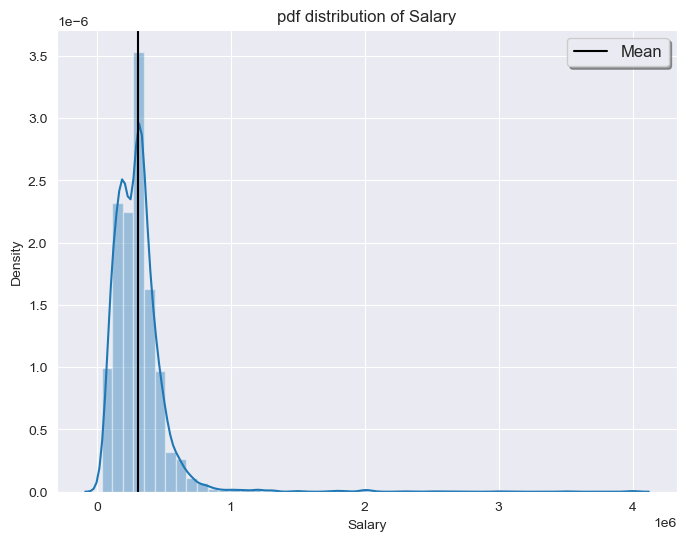

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the salary data
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.distplot(ameo['Salary'])
plt.axvline(ameo['Salary'].mean(), color='black', label='Mean')
plt.title("pdf distribution of Salary")
plt.legend(shadow=True, fontsize="larger")
plt.show()


In [16]:
# calucate the skeness and kurtosis
skew = ameo['Salary'].skew()
kurt = ameo['Salary'].kurt()
print('Skewness:{}'.format(round(skew,2)))
print('Kurtosis:{}'.format(round(kurt,2)))

Skewness:6.45
Kurtosis:80.93


####  PDF distribution of 12 percentage

Skewness:-0.03
Kurtosis:-0.63


C:\Users\shirisha\AppData\Local\Temp\ipykernel_12588\506501288.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ameo['12percentage'])


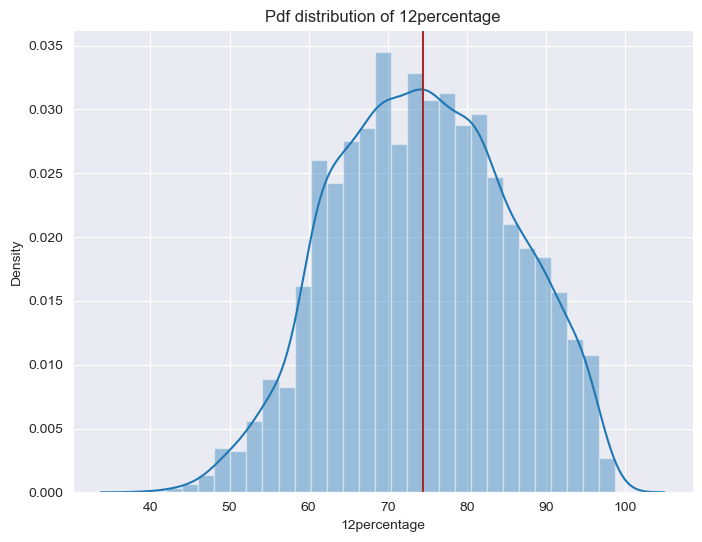

In [17]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
sns.distplot(ameo['12percentage'])
plt.axvline(ameo['12percentage'].mean(), color="brown", label="Mean")
plt.title("Pdf distribution of 12percentage")
skew = ameo['12percentage'].skew()
kurt = ameo['12percentage'].kurt()
print('Skewness:{}'.format(round(skew,2)))
print('Kurtosis:{}'.format(round(kurt,2)))

<p style ="font-size:25px; color:blue"><b>pdf distribution of college GPA:

Skewness: -1.25
Kurtosis: 10.23


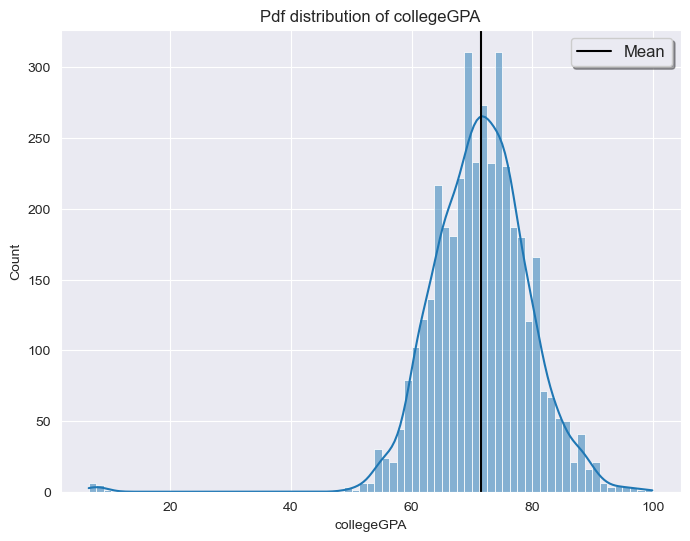

In [18]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
sns.histplot(ameo['collegeGPA'], kde=True)  # Use sns.histplot for histogram
plt.axvline(ameo['collegeGPA'].mean(), color="black", label="Mean")
plt.title("Pdf distribution of collegeGPA")
plt.legend(shadow=True, fontsize="larger")
print('Skewness:', round(ameo['collegeGPA'].skew(), 2))
print('Kurtosis:', round(ameo['collegeGPA'].kurt(), 2))


<p style ="font-size:25px; color:blue"><b>gender wise distribution plot:

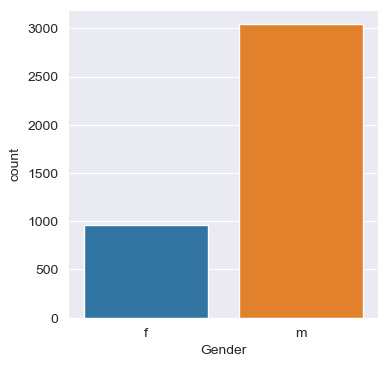

In [19]:
plt.figure(figsize=(4,4))
sns.countplot(x='Gender', data=ameo)
plt.show()


###   observation: From the above plot there are more male candidates than female

In [20]:
ameo.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

<p style ="font-size:25px; color:blue"><b>Designation:

In [21]:
ameo['Designation']

0           senior quality engineer
1                 assistant manager
2                  systems engineer
3          senior software engineer
4                               get
                   ...             
3993              software engineer
3994               technical writer
3995    associate software engineer
3996             software developer
3997        senior systems engineer
Name: Designation, Length: 3998, dtype: object

In [22]:
## designation unique value
unique= ameo['Designation'].unique()
len(unique)

419

In [23]:
unique_count=ameo['Designation'].value_counts()
unique_count

software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: Designation, Length: 419, dtype: int64

In [24]:
unique_count[:13]

software engineer             539
software developer            265
system engineer               205
programmer analyst            139
systems engineer              118
java software engineer        111
software test engineer        100
project engineer               77
technical support engineer     76
senior software engineer       72
java developer                 67
test engineer                  57
web developer                  54
Name: Designation, dtype: int64

Text(0.5, 1.0, 'Designation ECE fresher')

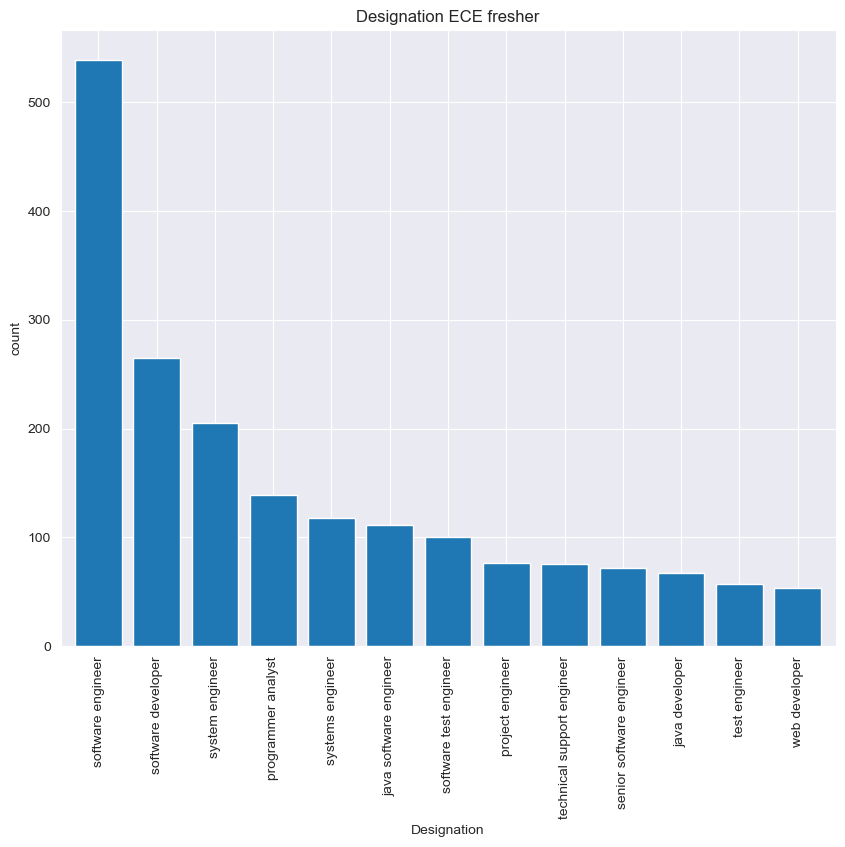

In [25]:
plt.figure(figsize=(10,8))
unique_count[:13].plot(kind='bar' , width=0.8)
plt.xlabel('Designation')
plt.ylabel('count')
plt.title("Designation ECE fresher")

## observation: most candicates choose the software engineer 

<p style ="font-size:25px; color:blue"><b>job location:

In [26]:
ameo['JobCity']

0              Bangalore
1                 Indore
2                Chennai
3                Gurgaon
4                Manesar
              ...       
3993          New Delhi 
3994           Hyderabad
3995           Bangalore
3996    Asifabadbanglore
3997             Chennai
Name: JobCity, Length: 3998, dtype: object

In [27]:
jobcity=ameo['JobCity'].unique()
len(jobcity)

339

#### 339 unique values

In [28]:
jcities_count=ameo['JobCity'].value_counts()
jcities_count

Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: JobCity, Length: 339, dtype: int64

#### wrond data "-1" replace with na value and drop it

In [29]:
ameo['JobCity'].replace(-1,np.nan,inplace=True)
ameo['JobCity'].dropna(inplace=True)

In [30]:
jcities_count=ameo['JobCity'].value_counts()
jcities_count

Bangalore           627
Noida               368
Hyderabad           335
Pune                290
Chennai             272
                   ... 
Asansol               1
Tirunelvelli          1
Ernakulam             1
Nanded                1
Asifabadbanglore      1
Name: JobCity, Length: 338, dtype: int64

In [31]:
jcities_count[:15]

Bangalore      627
Noida          368
Hyderabad      335
Pune           290
Chennai        272
Gurgaon        198
New Delhi      196
Mumbai         108
Kolkata         98
Jaipur          46
Lucknow         36
Mysore          36
Navi Mumbai     32
chennai         27
pune            26
Name: JobCity, dtype: int64

Text(0.5, 1.0, 'most frequent cities')

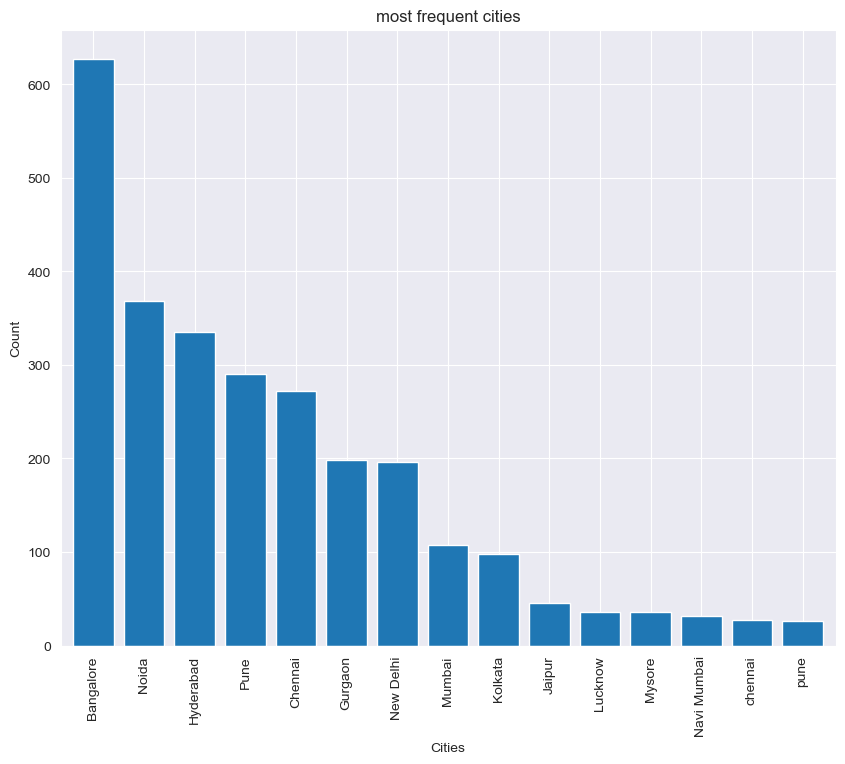

In [32]:
### most frequent cities
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
jcities_count[:15].plot(kind='bar' , width=0.8)
plt.xlabel('Cities')
plt.ylabel('Count')
plt.title('most frequent cities')


#### observation: most of the candicates choose the bangalore as their frequent city

<p style ="font-size:25px; color:blue"><b>Degree obtained/pursued by the cndidate: 

In [33]:
ameo['Degree']

0       B.Tech/B.E.
1       B.Tech/B.E.
2       B.Tech/B.E.
3       B.Tech/B.E.
4       B.Tech/B.E.
           ...     
3993    B.Tech/B.E.
3994    B.Tech/B.E.
3995    B.Tech/B.E.
3996    B.Tech/B.E.
3997    B.Tech/B.E.
Name: Degree, Length: 3998, dtype: object

In [34]:
deg_count=ameo['Degree'].value_counts()
deg_count

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

In [35]:
uniqudeg=ameo['Degree'].unique()
len(uniqudeg)

4

### there are 4 unique values

Text(0.5, 1.0, 'Degree obtained by the candidate')

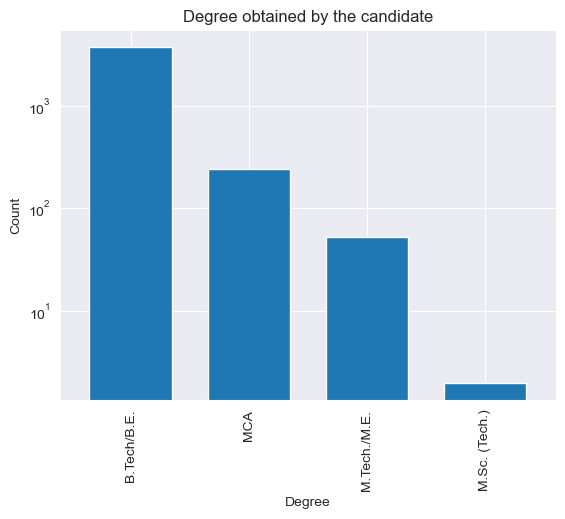

In [36]:
# Plotting the most frequent Degree

deg_count.plot(kind='bar' , width=0.7 , logy=True)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree obtained by the candidate')


### observation: most of the prefer pursuing  B.tech/B.E degree

<p style ="font-size:25px; color:blue"><b>specialization:

In [37]:
ameo['Specialization']

0                            computer engineering
1       electronics and communication engineering
2                          information technology
3                            computer engineering
4       electronics and communication engineering
                          ...                    
3993                       information technology
3994    electronics and communication engineering
3995                         computer engineering
3996               computer science & engineering
3997                       information technology
Name: Specialization, Length: 3998, dtype: object

In [38]:
unique_spe = ameo['Specialization'].unique()
len(unique_spe)

46

##### observation:specialization unique value 46

In [39]:
spe_count = ameo['Specialization'].value_counts()
spe_count

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical engineering           

In [40]:
spe_count[:15]

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
Name: Specialization, dtype: int64

Text(0.5, 1.0, 'most frequent Specialization')

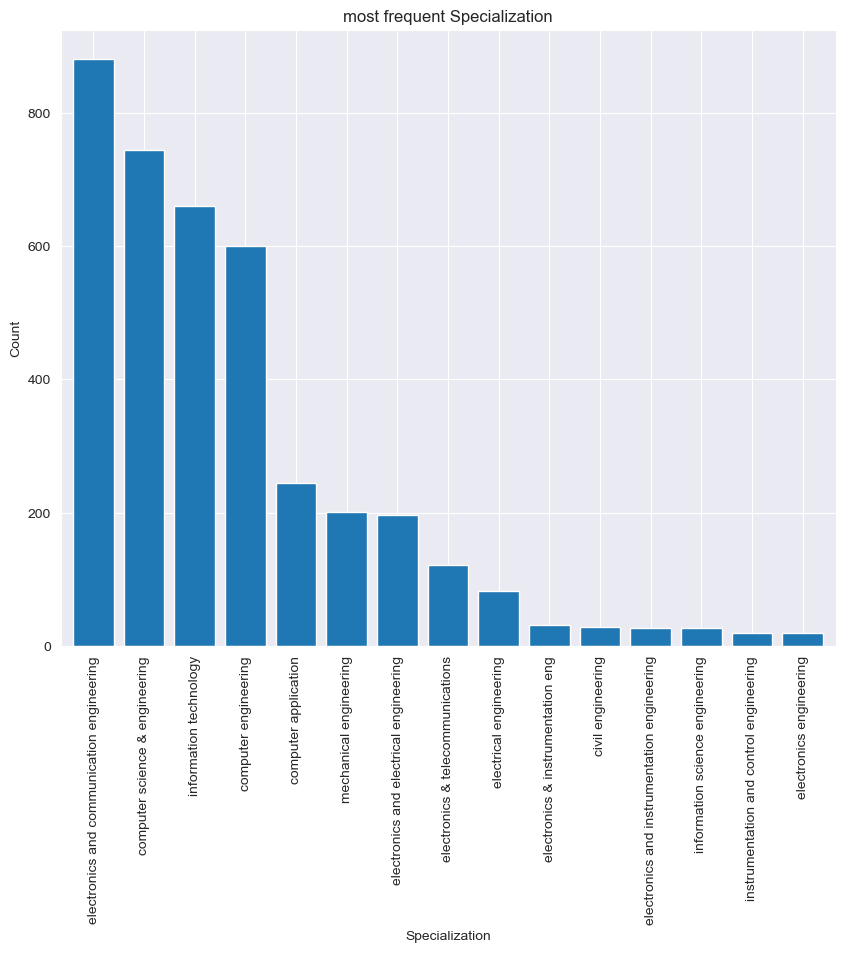

In [119]:
### most frequent cities
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
spe_count[:15].plot(kind='bar' , width=0.8)
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.title('most frequent Specialization')


#### observtaion:most candidate choosed specialization is Electronis and communication Engineering

<p style ="font-size:25px; color:blue"><b>States:

In [42]:
ameo['CollegeState']


0       Andhra Pradesh
1       Madhya Pradesh
2        Uttar Pradesh
3                Delhi
4        Uttar Pradesh
             ...      
3993           Haryana
3994         Telangana
3995            Orissa
3996         Karnataka
3997        Tamil Nadu
Name: CollegeState, Length: 3998, dtype: object

In [43]:
uniqu_clgsta= ameo['CollegeState'].unique()
len(uniqu_clgsta)
## 26 unique value

26

In [44]:
clgstat_valu = ameo['CollegeState'].value_counts()
clgstat_valu


Uttar Pradesh        915
Karnataka            370
Tamil Nadu           367
Telangana            319
Maharashtra          262
Andhra Pradesh       225
West Bengal          196
Punjab               193
Madhya Pradesh       189
Haryana              180
Rajasthan            174
Orissa               172
Delhi                162
Uttarakhand          113
Kerala                33
Jharkhand             28
Chhattisgarh          27
Gujarat               24
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Assam                  5
Union Territory        5
Sikkim                 3
Meghalaya              2
Goa                    1
Name: CollegeState, dtype: int64

In [45]:
clgstat_valu[:20]

Uttar Pradesh       915
Karnataka           370
Tamil Nadu          367
Telangana           319
Maharashtra         262
Andhra Pradesh      225
West Bengal         196
Punjab              193
Madhya Pradesh      189
Haryana             180
Rajasthan           174
Orissa              172
Delhi               162
Uttarakhand         113
Kerala               33
Jharkhand            28
Chhattisgarh         27
Gujarat              24
Himachal Pradesh     16
Bihar                10
Name: CollegeState, dtype: int64

Text(0.5, 1.0, 'CollegeState')

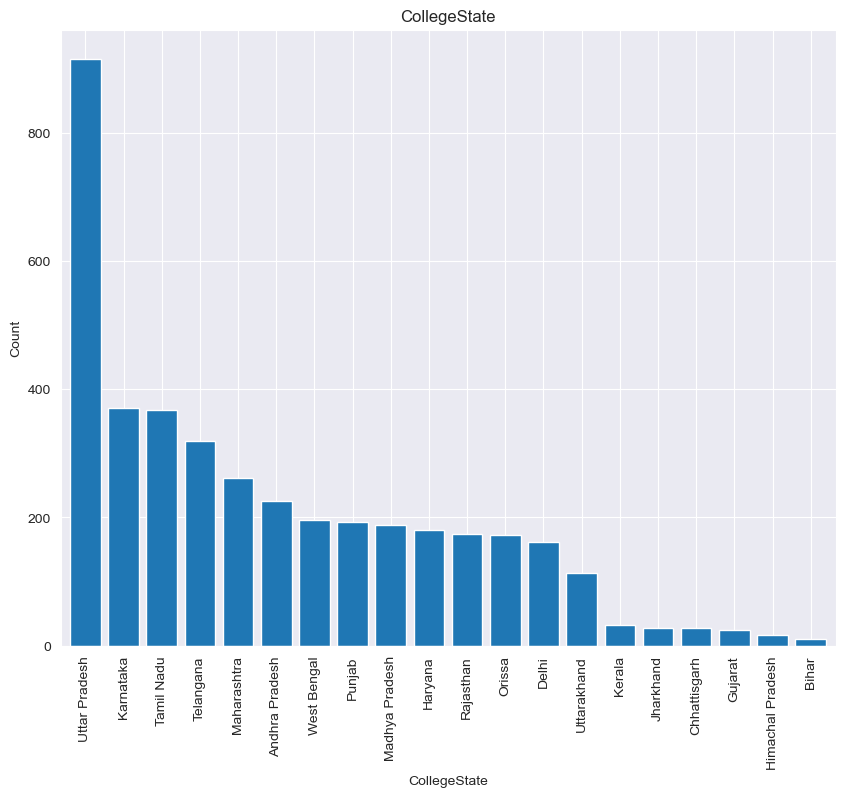

In [120]:
### most frequent cities
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
clgstat_valu[:20].plot(kind='bar' , width=0.8)
plt.xlabel('CollegeState')
plt.ylabel('Count')
plt.title('CollegeState')


### observation: uttart pradesh most preferrence colleges

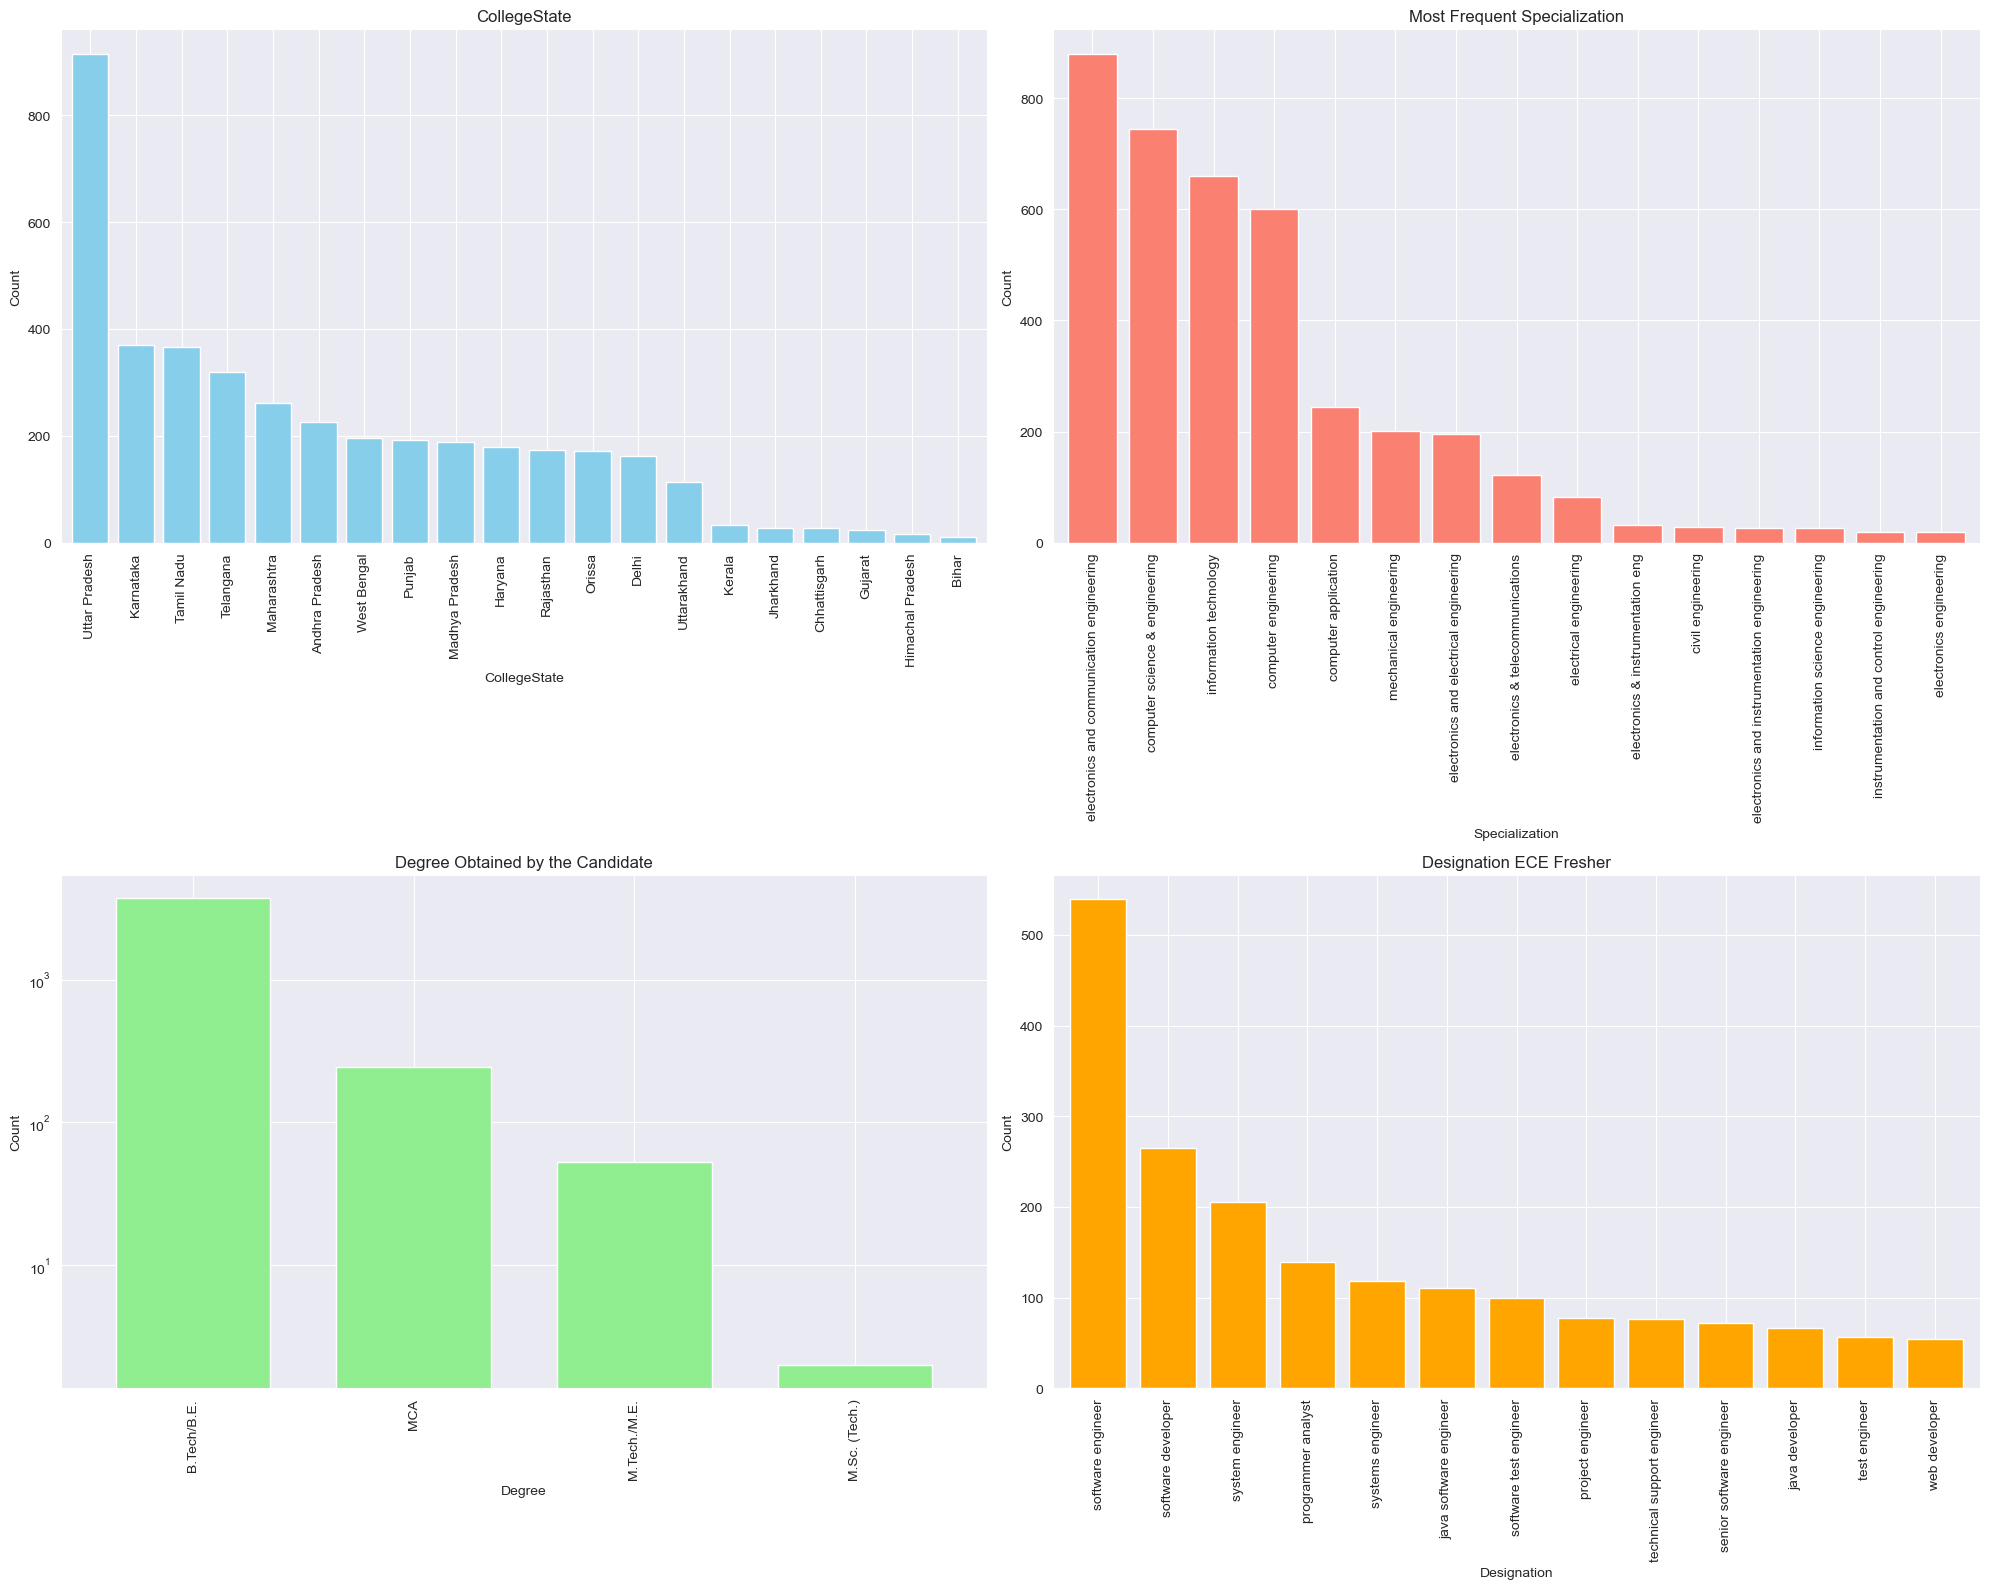

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the style
sns.set_style("darkgrid")

# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Plot 1: CollegeState
clgstat_valu[:20].plot(kind='bar', width=0.8, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_xlabel('CollegeState')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('CollegeState')

# Plot 2: Specialization
spe_count[:15].plot(kind='bar', width=0.8, ax=axes[0, 1], color='salmon')
axes[0, 1].set_xlabel('Specialization')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Most Frequent Specialization')

# Plot 3: Degree
deg_count.plot(kind='bar', width=0.7, logy=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_xlabel('Degree')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Degree Obtained by the Candidate')

# Plot 4: Designation
unique_count[:13].plot(kind='bar', width=0.8, ax=axes[1, 1], color='orange')
axes[1, 1].set_xlabel('Designation')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Designation ECE Fresher')
#sns.catplot(x='GraduationYear',hue='Gender',data = ameo,kind='count')


plt.tight_layout()
plt.show()


<p style ="font-size:25px; color:blue"><b>year wise employment gender: 

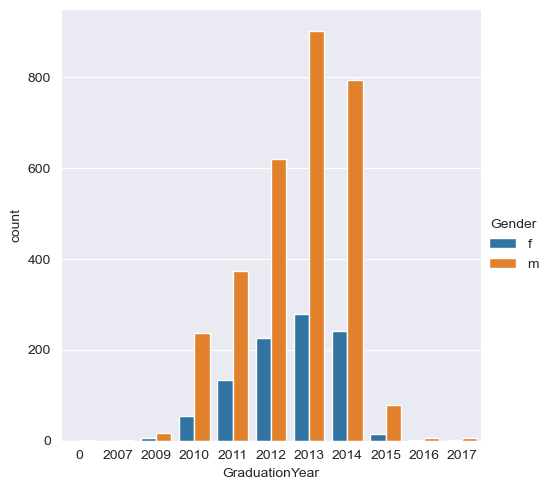

In [48]:
sns.catplot(x='GraduationYear',hue='Gender',data = ameo,kind='count')

#### observation: The plot indicates that employee joining was higher in 2013, lower in 2017, and consistently higher for male employees compared to female employees across all years.


In [107]:
ameo.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'n_sal'],
      dtype='object')

 <p style ="font-size:25px; color:red"><b>Finding the outliers each numaric columns:

<Axes: >

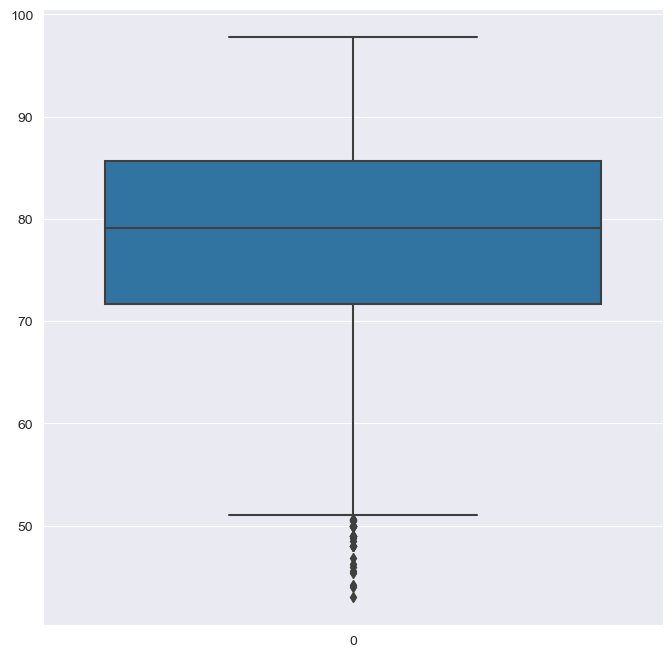

In [62]:
plt.figure(figsize=(8,8))
sns.set_style("darkgrid")
sns.boxplot(ameo['10percentage'])

In [63]:
ameo['10percentage'][ameo['10percentage']<52].reset_index()

index  10percentage
0     108         51.00
1     245         50.60
2     466         44.16
3     490         44.00
4     491         45.60
5     502         48.00
6     600         49.00
7     613         48.00
8     887         51.20
9     898         49.00
10    919         48.80
11   1064         49.00
12   1102         49.00
13   1169         48.50
14   1193         48.00
15   1235         50.60
16   1334         43.00
17   1838         50.00
18   1845         49.00
19   1955         45.33
20   1976         46.24
21   2024         51.36
22   2037         48.00
23   2123         51.00
24   2215         50.50
25   2217         51.00
26   2292         50.00
27   2432         50.00
28   2563         51.60
29   2655         50.66
30   2885         46.80
31   2982         50.00
32   3284         50.00
33   3425         50.00
34   3507         51.83
35   3525         51.42
36   3690         46.00
37   3743         49.90

<p style ="font-size:25px; color:blue"><b>Finding the outliers in Salary column:

<Axes: >

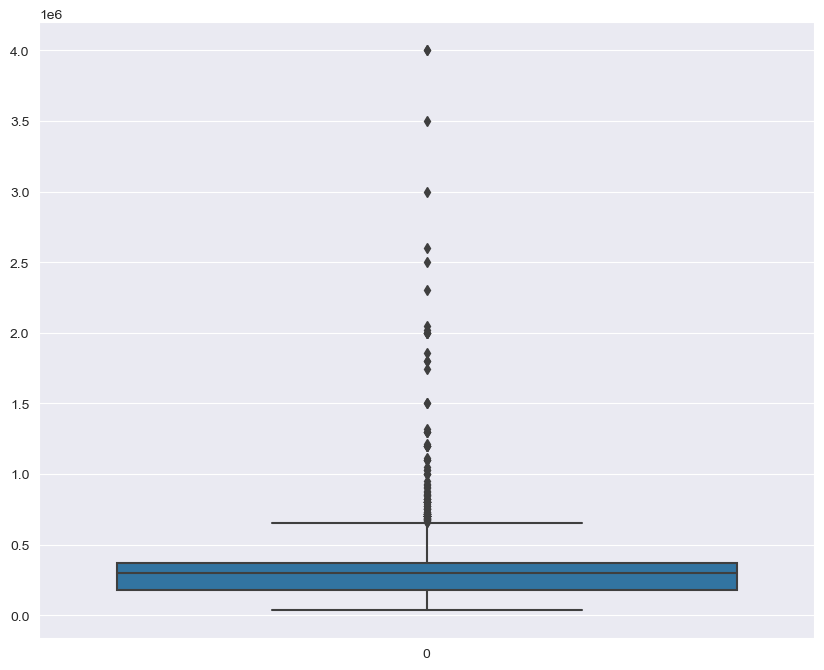

In [67]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(ameo['Salary'])

<p style ="font-size:25px; color:blue"><b>College GPA  column:

<Axes: >

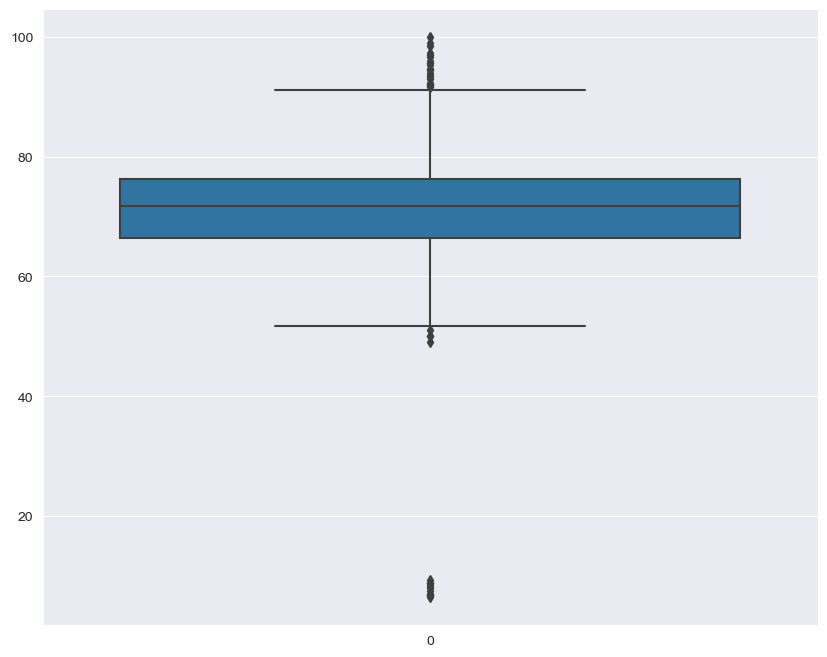

In [68]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(ameo['collegeGPA'])

<p style ="font-size:25px; color:red"><b>Bivariate Analysis:</b></p>

<p style ="font-size:18px; color:brown; text-decoration:underline;"><b>Correlation between the features using corr() function:</b></p>

In [69]:
ameo.corr()

C:\Users\shirisha\AppData\Local\Temp\ipykernel_12588\3425908024.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ameo.corr()


ID    Salary  10percentage  12graduation  \
ID                     1.000000 -0.247294      0.044547      0.673102   
Salary                -0.247294  1.000000      0.177373     -0.161383   
10percentage           0.044547  0.177373      1.000000      0.269957   
12graduation           0.673102 -0.161383      0.269957      1.000000   
12percentage           0.007069  0.170254      0.643378      0.259166   
CollegeID              0.284540 -0.118690      0.021082      0.254021   
CollegeTier            0.035160 -0.179332     -0.126042      0.027691   
collegeGPA             0.047144  0.130103      0.312538      0.086001   
CollegeCityID          0.284540 -0.118690      0.021082      0.254021   
CollegeCityTier       -0.035977  0.015384      0.116707     -0.003016   
GraduationYear         0.027539 -0.010053     -0.013799      0.014457   
English                0.135505  0.178219      0.350780      0.147925   
Logical                0.102215  0.179275      0.316014      0.105887   
Quant                 -0.055134  0.230627      0.317640      0.001379   
Domain                -0.125639  0.104656      0.078563     -0.034163   
ComputerProgramming    0.018859  0.115665      0.053600     -0.047995   
ElectronicsAndSemicon -0.115601  0.000665      0.085179     -0.005891   
ComputerScience        0.482626 -0.100720     -0.018933      0.293439   
MechanicalEngg        -0.026147  0.018475      0.050364      0.035459   
ElectricalEngg         0.104454 -0.047598      0.074419      0.123751   
TelecomEngg           -0.049272 -0.022691      0.049378      0.023470   
CivilEngg             -0.017871  0.037639      0.030002     -0.004727   
conscientiousness      0.175557 -0.064148      0.067657      0.103329   
agreeableness          0.024837  0.057423      0.136645      0.041182   
extraversion           0.120979 -0.010213     -0.004679      0.061956   
nueroticism           -0.146289 -0.054685     -0.132496     -0.074369   
openess_to_experience  0.031359 -0.011312      0.036692     -0.015069   

                       12percentage  CollegeID  CollegeTier  collegeGPA  \
ID                         0.007069   0.284540     0.035160    0.047144   
Salary                     0.170254  -0.118690    -0.179332    0.130103   
10percentage               0.643378   0.021082    -0.126042    0.312538   
12graduation               0.259166   0.254021     0.027691    0.086001   
12percentage               1.000000   0.022336    -0.100771    0.346137   
CollegeID                  0.022336   1.000000     0.067054    0.017240   
CollegeTier               -0.100771   0.067054     1.000000   -0.086781   
collegeGPA                 0.346137   0.017240    -0.086781    1.000000   
CollegeCityID              0.022336   1.000000     0.067054    0.017240   
CollegeCityTier            0.130462   0.007757    -0.101494    0.017471   
GraduationYear            -0.012933  -0.000172    -0.005557    0.008706   
English                    0.212888  -0.022792    -0.183843    0.106478   
Logical                    0.243571  -0.047094    -0.182811    0.196610   
Quant                      0.312413  -0.114672    -0.251103    0.217380   
Domain                     0.074099  -0.073857    -0.061436    0.107252   
ComputerProgramming        0.080818  -0.033760    -0.073644    0.136596   
ElectronicsAndSemicon      0.117112  -0.020438    -0.031573    0.029855   
ComputerScience           -0.043534   0.102303     0.001053    0.007601   
MechanicalEngg             0.037635  -0.009291    -0.021548   -0.031765   
ElectricalEngg             0.064001   0.022933     0.002594    0.052258   
TelecomEngg                0.044201   0.025620     0.000007   -0.005226   
CivilEngg                  0.005910   0.005749    -0.033722   -0.018950   
conscientiousness          0.058299   0.076432     0.055174    0.069582   
agreeableness              0.103998  -0.005264    -0.038055    0.068282   
extraversion              -0.007486   0.005917     0.009970   -0.032684   
nueroticism               -0.09436

**where -1 means negatively correlated and +1 means highly positive relation**

<p style ="font-size:18px; color:brown; text-decoration:underline;"><b>Correlation between the features using Heatmap:</b></p>

C:\Users\shirisha\AppData\Local\Temp\ipykernel_12588\3493636635.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ameo.corr() , annot=True)


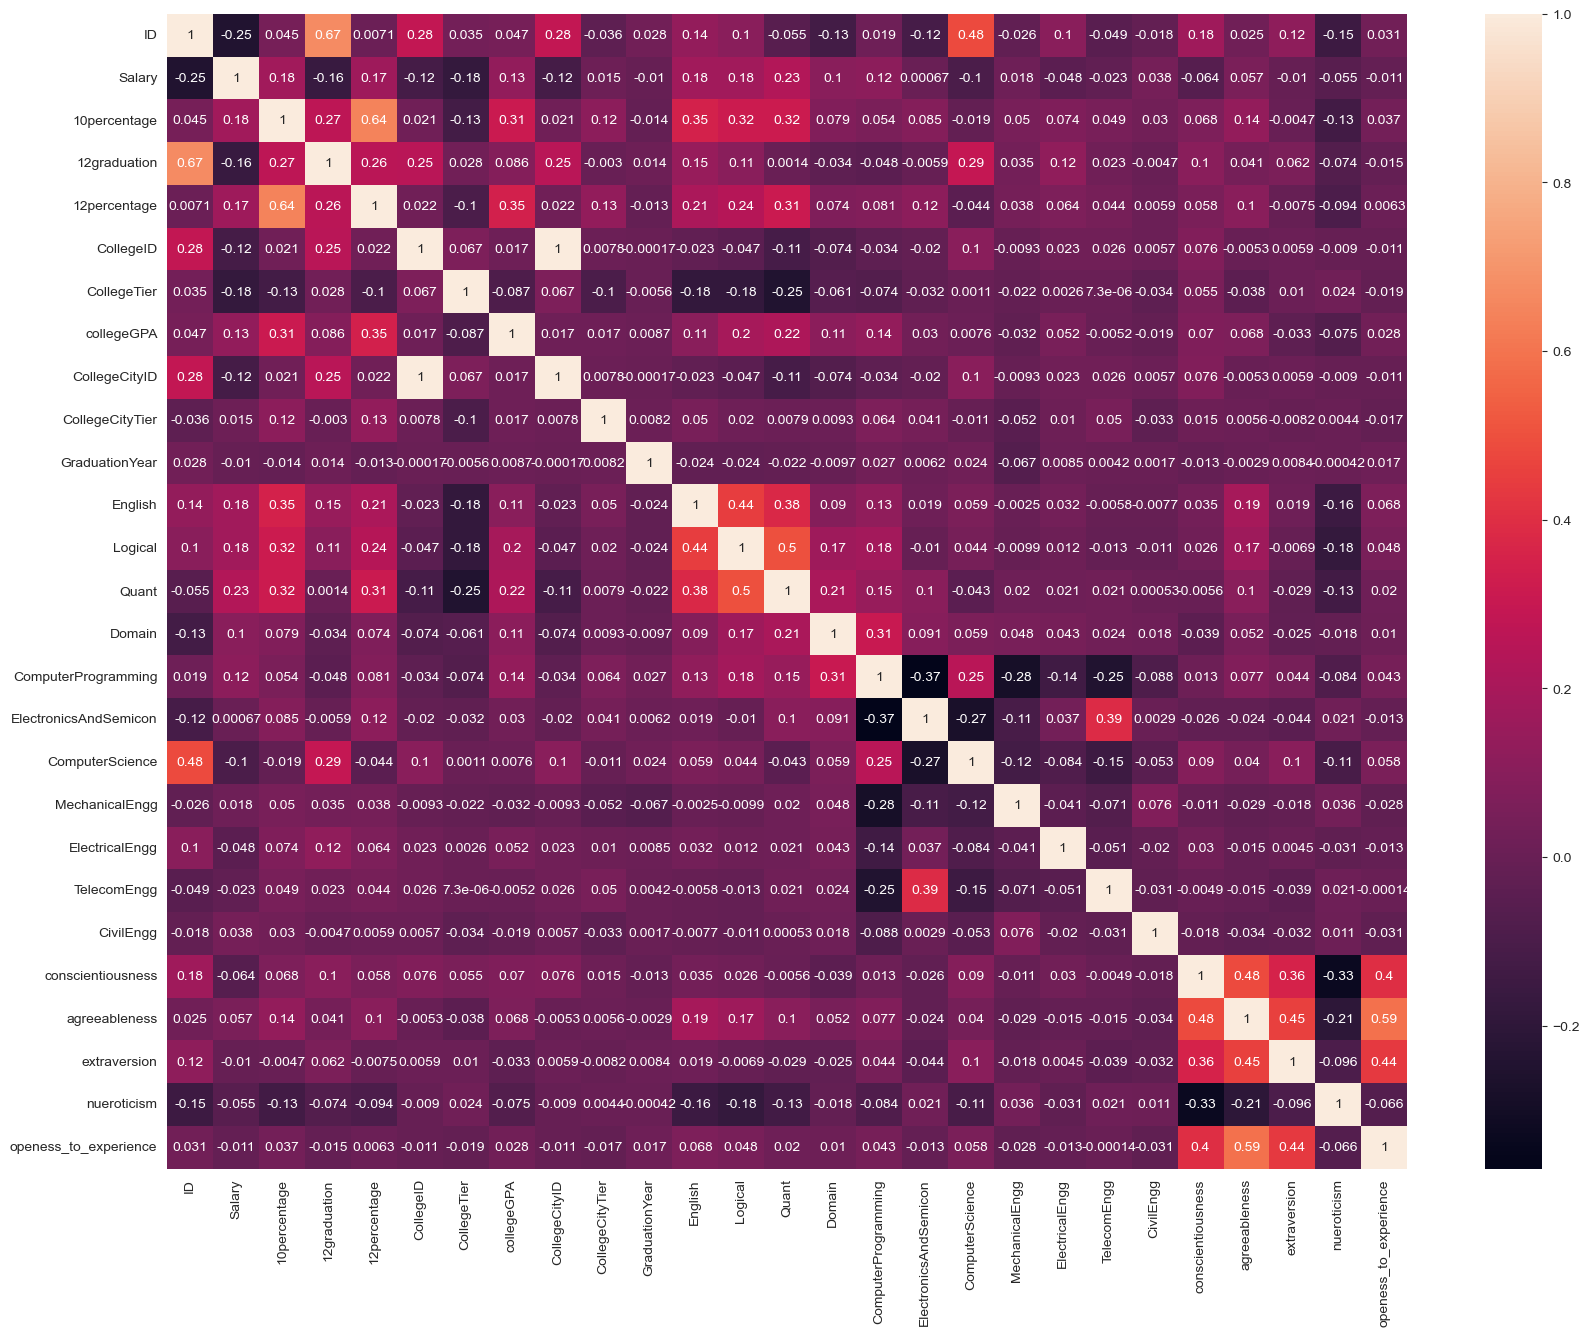

In [70]:
plt.figure(figsize=(20,15))
sns.heatmap(ameo.corr() , annot=True)
plt.show()

1. **From the above plot we can say that 10percentage and 12percentage is highly positively correlated with each other means if a student got a better marks in 10th standard then it is highly possible that he or she can get the better marks in 12th standard also**
2. **We can also say that the subjects English,Logical,Quant are also positively correlated with each other means if a student get better marks in one subject then it is highly possible that he or she will get better marks in other subjects also**


<p style ="font-size:18px; color:brown; text-decoration:underline;"><b>Correlation between the features using pairplot:</b></p>

<Figure size 2000x1500 with 0 Axes>

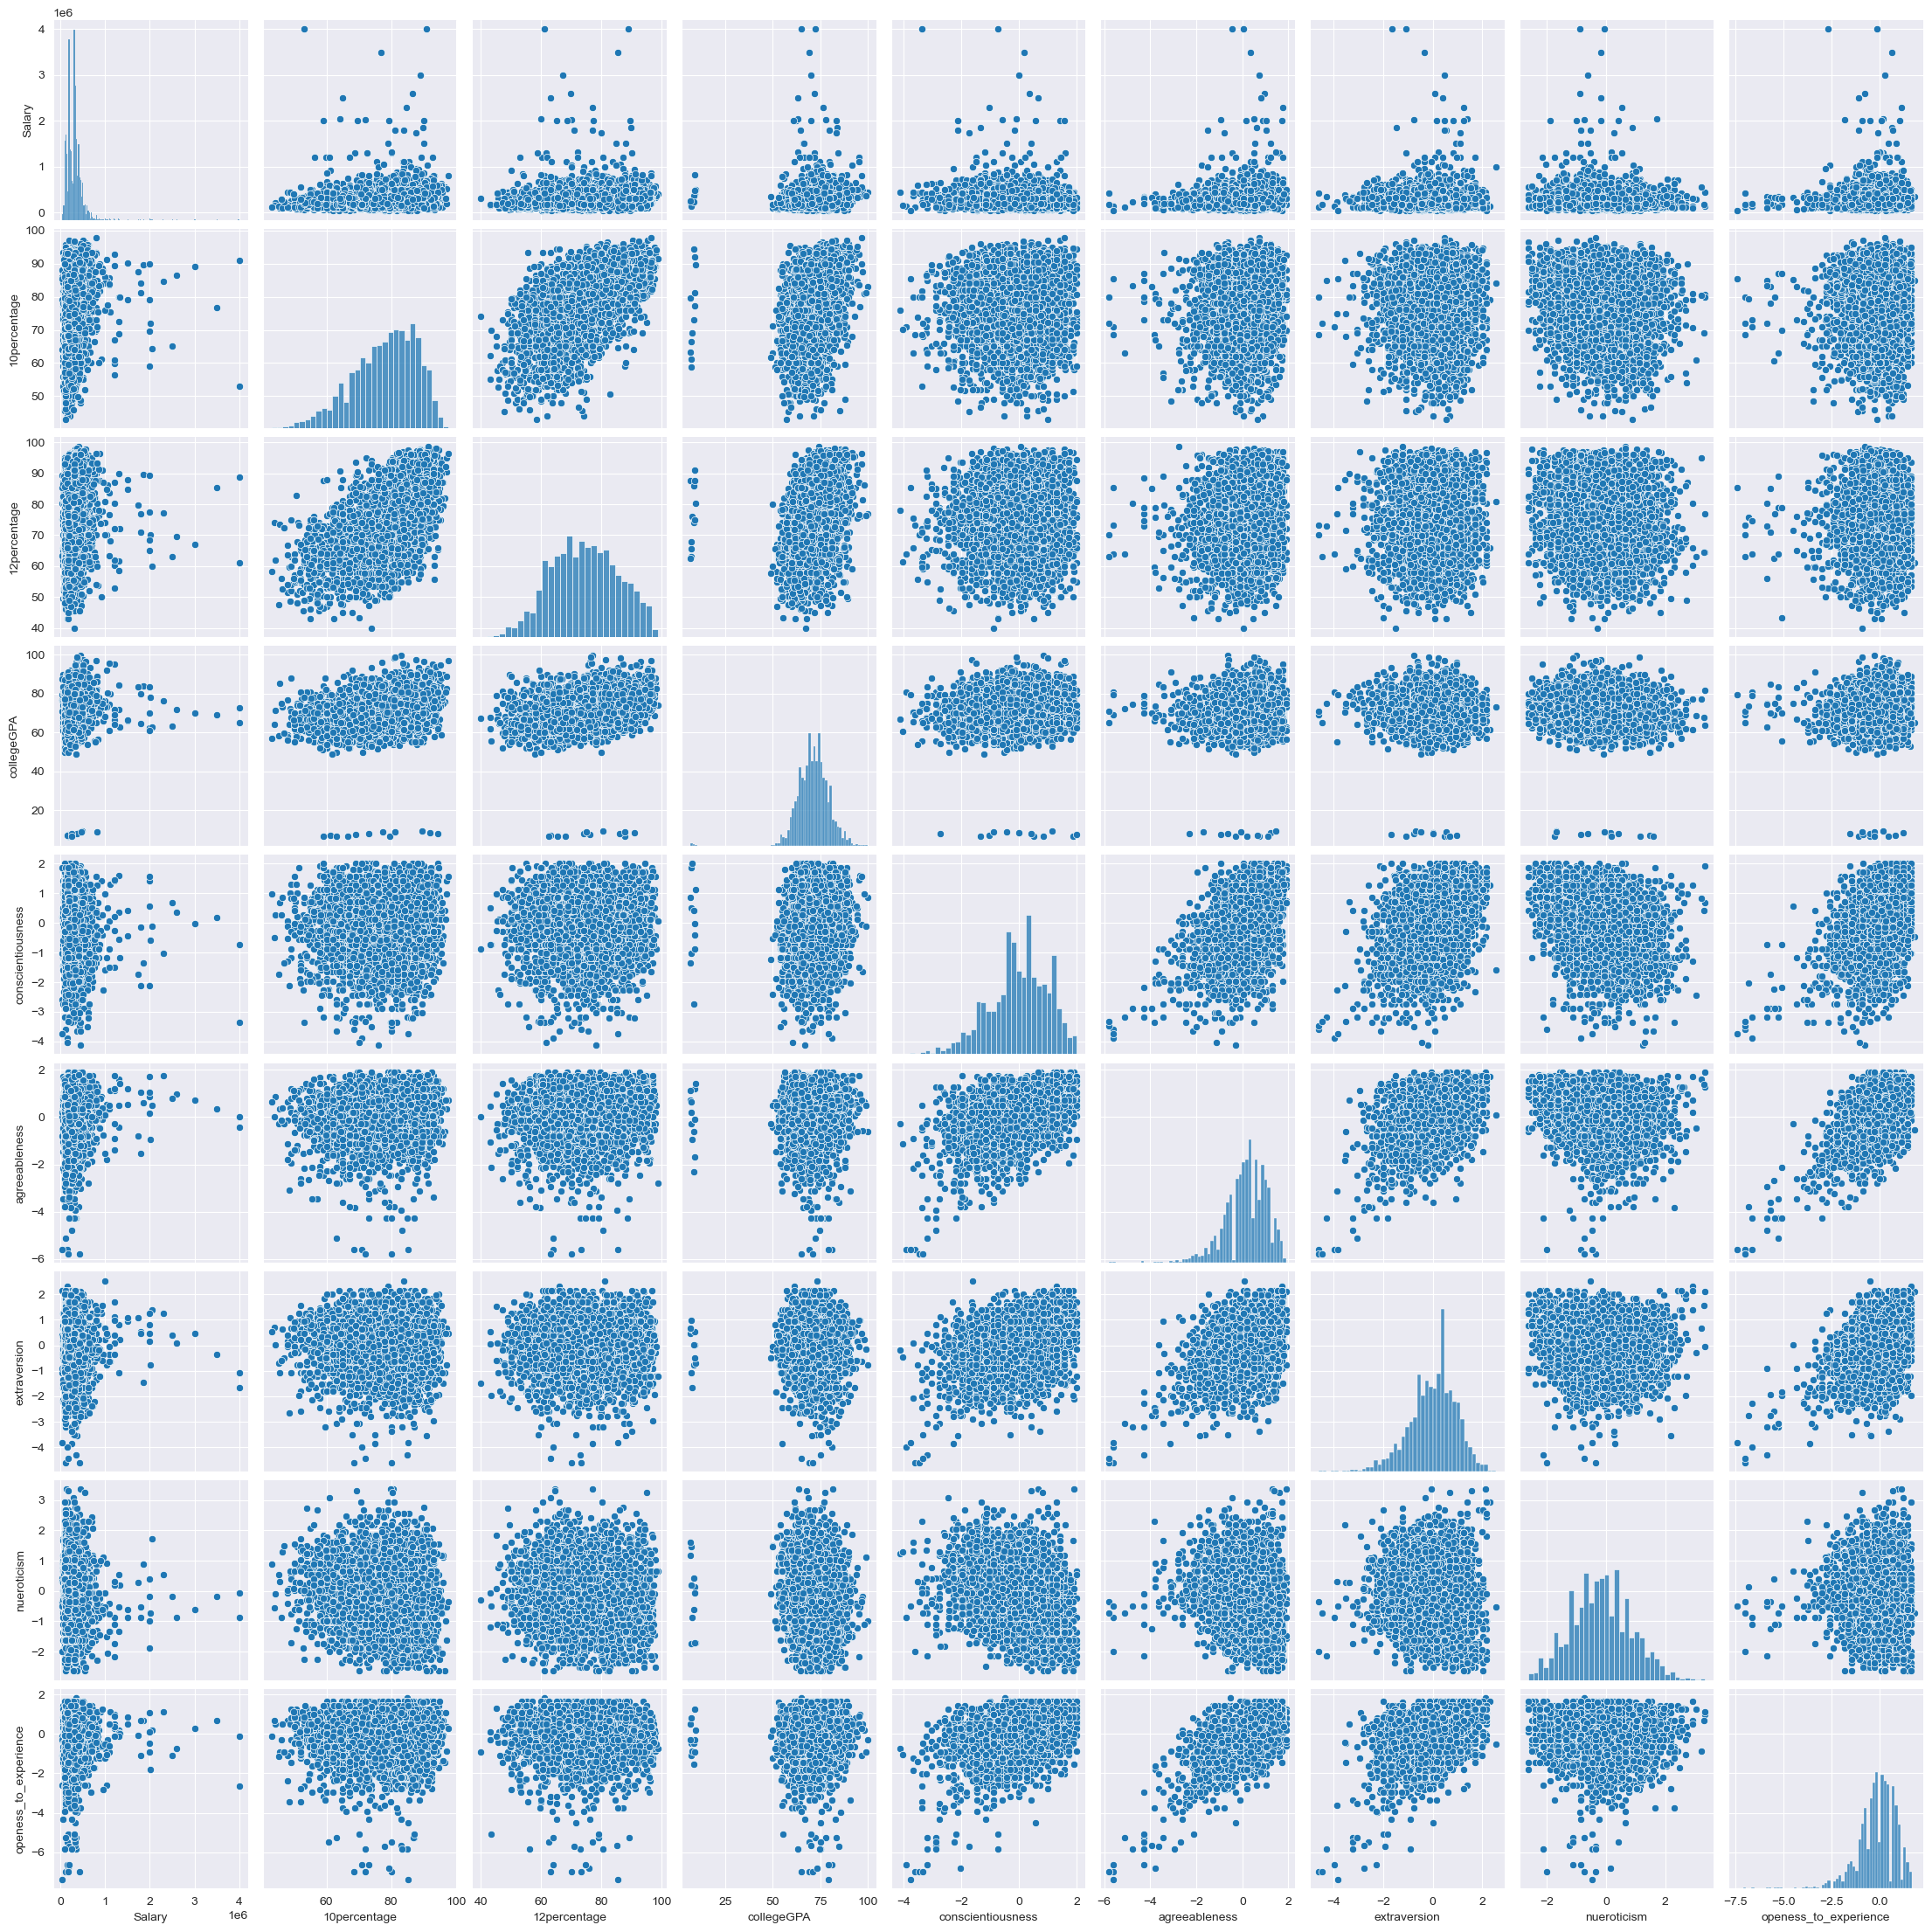

In [71]:
plt.figure(figsize=(20,15))
data=ameo[['Salary','10percentage','12percentage','collegeGPA','conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience']]
sns.pairplot(data)
plt.show()

<p style ="font-size:18px; color:brown; text-decoration:underline;"><b>Correlation between the features using scatterplot:</b></p>

<Axes: xlabel='10percentage', ylabel='12percentage'>

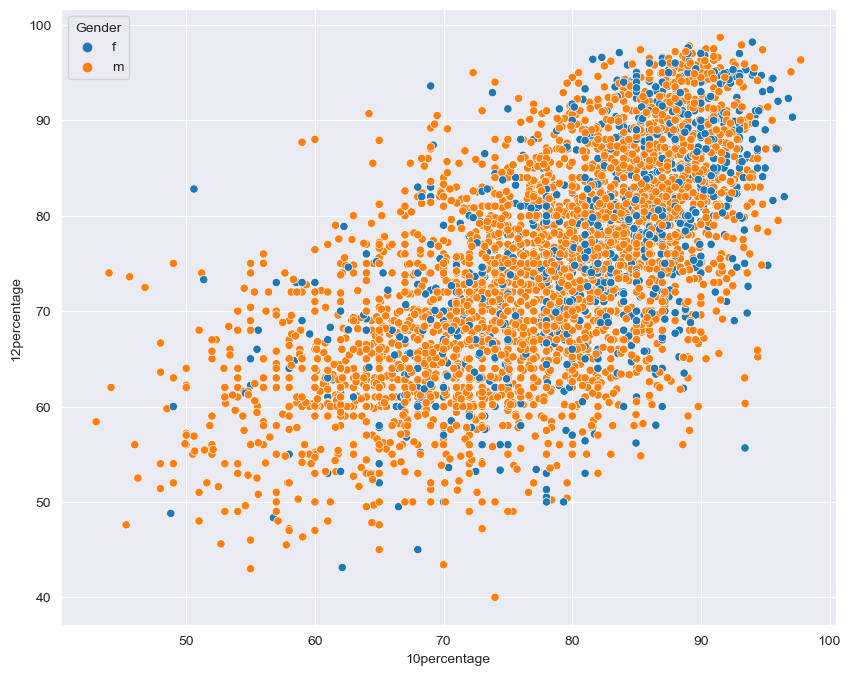

In [72]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.scatterplot(data=ameo, x="10percentage", y="12percentage",hue="Gender")


<p style ="font-size:18px; color:brown; text-decoration:underline;"><b>Correlation between the features using boxplot:</b></p>

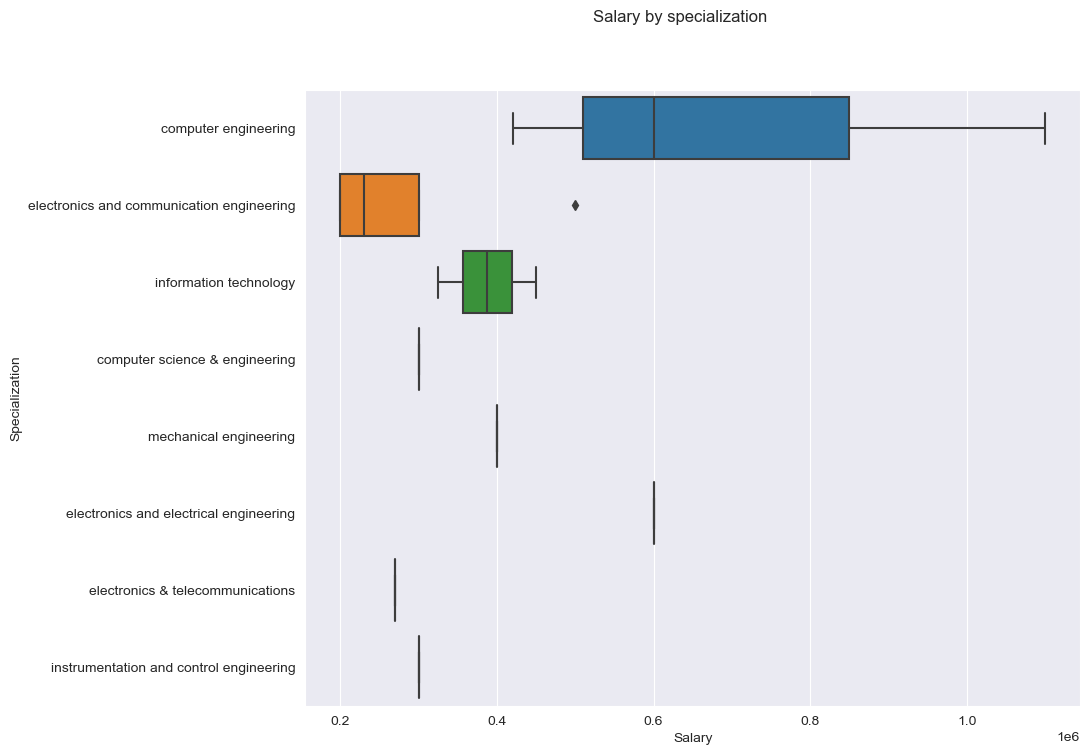

In [73]:
# Salary by Specialization
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(x=ameo['Salary'].iloc[:15], y = ameo['Specialization'].iloc[:15])
plt.suptitle('Salary by specialization')
plt.show()

<p style ="font-size:30px; color:red"><b>Research Questions:</b></p>

**Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data.**

<p style ="font-size:25px; color:blue"><b>Hypothesis Testing:</b></p>

In [75]:
ameo.head()

Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0              -1              -1              -1          -1         -1   
1              -1              -1              -1          -1         -1   
2              -1              -1              -1          -1         -1   
3              -1              -1              -1          -1         -1   
4              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [76]:
## salary for better visualization
ameo['n_sal']=ameo['Salary']/100000

In [77]:
ameo[['Designation','Specialization']][ameo['Designation']=='hardware engineer']

Designation                             Specialization
197   hardware engineer                     electrical engineering
802   hardware engineer  electronics and communication engineering
839   hardware engineer  electronics and communication engineering
1886  hardware engineer  electronics and communication engineering
2070  hardware engineer  electronics and communication engineering
2533  hardware engineer  electronics and communication engineering
3438  hardware engineer                    electronics engineering
3547  hardware engineer  electronics and communication engineering

In [80]:
print('Average Salary :')
print('Programmer Analyst :',round(ameo['n_sal'][(ameo['GraduationYear']==2014) & (ameo['Designation']=='programmer analyst') & (ameo['Specialization']=='computer science & engineering')].mean(), 2))
print('Software Engineer :',round(ameo['n_sal'][(ameo['GraduationYear']==2014) & (ameo['Designation']=='software engineer')  & (ameo['Specialization']=='computer science & engineering')].mean(),2))
print('Hardware Engineer :',round(ameo['n_sal'][(ameo['GraduationYear']==2014) &(ameo['Designation']=='hardware engineer')  & (ameo['Specialization']=='computer science & engineering')].mean(), 2))
print('Associate Engineer :',round(ameo['n_sal'][(ameo['GraduationYear']==2014) &(ameo['Designation']=='associate engineer')  & (ameo['Specialization']=='computer science & engineering')].mean(), 2))

Average Salary :
Programmer Analyst : 3.02
Software Engineer : 3.4
Hardware Engineer : nan
Associate Engineer : 3.32


In [82]:
# Sample Data for Required Employees
sample = [3.16,3.6,0,3.5]
sample = np.array(sample)

In [84]:
# Necessary variables initialization ex- sample mean
sample_size = len(sample)
sample_mean = np.mean(sample)
sample_mean

2.565

In [85]:
# Sample Standard Devation
import math
sample_std = math.sqrt(sum([(i-sample_mean)**2 for i in sample]) / 3)
print('Sample Standard Deviation :', sample_std)

Sample Standard Deviation : 1.7203391138571102


In [87]:
# Calulating T-Score
def t_score(pop_mean, sample_mean, sample_std, sample_size):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / (sample_size**0.5)
    return numerator / denomenator

In [89]:
# Necessary variables initialization ex- sample mean,population mean
pop_mean = 2.75
sample_mean = 3.34
sample_std = 0.21
sample_size = 4

In [90]:
# Calling T-score Function
t_sc = t_score(pop_mean, sample_mean, sample_std, sample_size)
print('t-score :', t_sc)

t-score : 5.619047619047618


In [93]:
# Setting the Confidence Level

# Two Tail - Deciding the Significance Level & Calculating the t-critical value
from scipy.stats import t
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = t.ppf(1-alpha/2, df = 3)
print('t_critical :', t_critical)

t_critical : 3.182446305284263


t_critical_left : 2.4158431379451524
t_critical_right : 3.0841568620548476


Text(3.34, 0.1, 'x_bar')

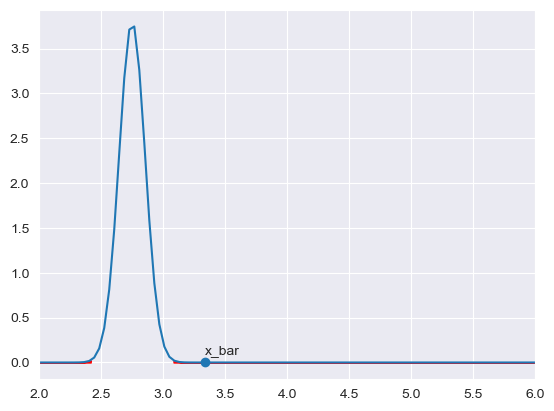

In [94]:
# Visualizing the Sampling Distribution with Rejection Regions
from scipy.stats import norm
# Defining the x min & x max
x_min = 2
x_max =6

# Defining the Sampling Distribution mean & std
mean = pop_mean
std = sample_std / (sample_size**0.5)

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the left and right critical values of Two tailed Test
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

print('t_critical_left :', t_critical_left)
print('t_critical_right :', t_critical_right)

# Shading the left rejection region
x_left = np.linspace(x_min, t_critical_left, 100)
y_left = norm.pdf(x_left, mean, std)
plt.fill_between(x_left, y_left, color='red')

# Shading the right rejection region
x_right = np.linspace(t_critical_right, x_max, 100)
y_right = norm.pdf(x_right, mean, std)
plt.fill_between(x_right, y_right, color='red')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

In [95]:
# Conclusion using p-test
p_value = 2 * (1.0 - norm.cdf(np.abs(t_sc)))

print("p_value = ", p_value)

if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  1.9201293444126577e-08
Reject Null Hypothesis


<p style ="font-size:30px; color:red"><b>Feature Transformation:</b></p>

<p style ="font-size:18px; color:blue; text-decoration:underline;"><b>Column Standardization for Numerical Features:</b></p>

In [96]:
# Column standardization using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [97]:
# Standardizing Salary Column
scaled_sal = scaler.fit_transform(data['Salary'].values.reshape(-1,1))

# First 20 Scaled Values (Salary column)
print(scaled_sal[:20])

[[0.09709962]
 [0.11727617]
 [0.07313997]
 [0.26860025]
 [0.04161412]
 [0.0668348 ]
 [0.0668348 ]
 [0.09205549]
 [0.14249685]
 [0.04918033]
 [0.14249685]
 [0.10466583]
 [0.0592686 ]
 [0.04161412]
 [0.0668348 ]
 [0.07944515]
 [0.07313997]
 [0.05422446]
 [0.02143758]
 [0.07313997]]


In [98]:
# Standardizing 12th percent Column
scaled_12 = scaler.fit_transform(data['12percentage'].values.reshape(-1,1))

# First 20 Scaled Values (Salary column)
print(scaled_12[:20])

[[0.95059625]
 [0.76660988]
 [0.48040886]
 [0.7427598 ]
 [0.62691652]
 [0.80068143]
 [0.46848382]
 [0.86882453]
 [0.87223169]
 [0.54855196]
 [0.74446337]
 [0.78364566]
 [0.50817717]
 [0.38160136]
 [0.67972743]
 [0.41618399]
 [0.59284497]
 [0.45417376]
 [0.42248722]
 [0.37819421]]


<p style ="font-size:18px; color:blue; text-decoration:underline;"><b>Column Standardization for Categorical Features:</b></p>

In [99]:
dumie=pd.get_dummies(ameo[['Gender']])
dumie

Gender_f  Gender_m
0            1         0
1            0         1
2            1         0
3            0         1
4            0         1
...        ...       ...
3993         0         1
3994         1         0
3995         0         1
3996         1         0
3997         1         0

[3998 rows x 2 columns]

In [100]:
df1= pd.concat([ameo,dumie],axis='columns')
df1.head()

Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  TelecomEngg  CivilEngg  conscientiousness agreeableness  extraversion  \
0          -1         -1             0.9737        0.8128        0.5269   
1          -1         -1            -0.7335        0.3789        1.2396   
2          -1         -1             0.2718        1.7109        0.1637   
3          -1         -1             0.0464        0.3448       -0.3440   
4          -1         -1            -0.8810       -0.2793       -1.0697   

   nueroticism openess_to_experience  n_sal  Gender_f  Gender_m  
0      1.35490               -0.4455   4.20         1         0  
1     -0.10760                0.8637   5.00         0         1  
2     -0.86820                0.6721   3.25         1         0  
3     -0.40780               -0.9194  11.00         0         1  
4      0.09163               -0.1295   2.00         0         1  

[5 rows x 42 columns]

In [101]:
final_df=df1.drop(['Gender','Gender_f'],axis='columns')
final_df

Unnamed: 0      ID   Salary        DOJ                  DOL  \
0         train  203097   420000 2012-06-01              present   
1         train  579905   500000 2013-09-01              present   
2         train  810601   325000 2014-06-01              present   
3         train  267447  1100000 2011-07-01              present   
4         train  343523   200000 2014-03-01  2015-03-01 00:00:00   
...         ...     ...      ...        ...                  ...   
3993      train   47916   280000 2011-10-01  2012-10-01 00:00:00   
3994      train  752781   100000 2013-07-01  2013-07-01 00:00:00   
3995      train  355888   320000 2013-07-01              present   
3996      train  947111   200000 2014-07-01  2015-01-01 00:00:00   
3997      train  324966   400000 2013-02-01              present   

                      Designation           JobCity        DOB  10percentage  \
0         senior quality engineer         Bangalore 1990-02-19         84.30   
1               assistant manager            Indore 1989-10-04         85.40   
2                systems engineer           Chennai 1992-08-03         85.00   
3        senior software engineer           Gurgaon 1989-12-05         85.60   
4                             get           Manesar 1991-02-27         78.00   
...                           ...               ...        ...           ...   
3993            software engineer        New Delhi  1987-04-15         52.09   
3994             technical writer         Hyderabad 1992-08-27         90.00   
3995  associate software engineer         Bangalore 1991-07-03         81.86   
3996           software developer  Asifabadbanglore 1992-03-20         78.72   
3997      senior systems engineer           Chennai 1991-02-26         70.60   

                             10board  ...  ElectricalEngg  TelecomEngg  \
0     board ofsecondary education,ap  ...              -1           -1   
1                               cbse  ...              -1           -1   
2                               cbse  ...              -1           -1   
3                               cbse  ...              -1           -1   
4                               cbse  ...              -1           -1   
...                              ...  ...             ...          ...   
3993                            cbse  ...              -1           -1   
3994                     state board  ...              -1           -1   
3995                      bse,odisha  ...              -1           -1   
3996                     state board  ...              -1           -1   
3997                            cbse  ...              -1           -1   

     CivilEngg  conscientiousness  agreeableness extraversion nueroticism  \
0           -1             0.9737         0.8128       0.5269     1.35490   
1           -1            -0.7335         0.3789       1.2396    -0.10760   
2           -1             0.2718         1.7109       0.1637    -0.86820   
3           -1             0.0464         0.3448      -0.3440    -0.40780   
4           -1            -0.8810        -0.2793      -1.0697     0.09163   
...        ...                ...            ...          ...         ...   
3993        -1            -0.1082         0.3448       0.2366     0.64980   
3994        -1            -0.3027         0.8784       0.9322     0.77980   
3995        -1            -1.5765        -1.5273      -1.5051    -1.31840   
3996        -1            -0.1590         0.0459      -0.4511    -0.36120   
3997        -1            -1.1128        -0.2793      -0.6343     1.32553   

      openess_to_experience  n_sal  Gender_m  
0                   -0.4455   4.20         0  
1                    0.8637   5.00         1  
2                    0.6721   3.25         0  
3                   -0.9194  11.00         1  
4                   -0.1295   2.00         1  
...                     ...    ...       ...  
3993                -0.9194   2.80         1  
3994                -0.0943   1.00   

###  Overall Conclusions:
***1.Most of Amcat Aspirants are male working in IT domain with an experience of around 5years with degree in Btech and specialization in  ECE And Computer Science/Information Technology from tier-2 college in uttarpradesh.
2.Highpaying jobs taken up by amcat aspirants are mostly from 'IT' Domain.
3.Software Engineer and Software Developer are the most aimed profession for amcat aspirants***